In [1]:
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #模型驗證

決策樹教學:https://tw511.com/a/01/6581.html

## 以人群資料為 y

In [121]:
data = pd.read_csv('training data/會員資料和購買意圖整理對照表.csv', encoding='big5')

In [122]:
data.columns

Index(['MemberID', 'Age', 'Gender', 'Birthday', 'IsEnableEmail',
       'IsEnablePushNotification', 'IsEnableShortMessage', 'MemberCardLevel',
       'platform', 'os', 'browser', 'location_original', 'location',
       'location_highest', 'habit_weekday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'habit_hour', '0-6',
       '6月12日', '12月18日', '18-24', 'month_usage_score', '人群標籤', 'uid',
       'viewproduct_all', 'add_all', 'checkout_all', 'ave_purchase_grade',
       '累計金額', '每次平均消費金額', 'Gender_process', 'IsEnableEmail_process',
       'IsEnablePushNotification_process', 'IsEnableShortMessage_process',
       'platform_process', 'os_process', 'browser_process',
       'location_highest_process', 'cumulated_value',
       'average_cumulated_value', '購買意圖標籤'],
      dtype='object')

In [123]:
len(data.loc[data["add_all"] == 0])
# len(data.loc[data["人群標籤"] == 1])

419

In [124]:
features = ['Age','MemberCardLevel','month_usage_score','viewproduct_all',
       'add_all', 'checkout_all', 'ave_purchase_grade', 'Gender_process',
       'IsEnableEmail_process', 'IsEnablePushNotification_process',
       'IsEnableShortMessage_process', 'platform_process', 'os_process',
       'browser_process', 'location_highest_process', 'cumulated_value','average_cumulated_value']

In [125]:
X = data[features]
y = data["人群標籤"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2,)
X_train.shape,X_test.shape

((2821, 17), (706, 17))

In [15]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=10)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=100)

In [16]:
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                   feature_names=features,
                   class_names=["direct", "ad"],
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [17]:
graph.render(filename='img/y_for_people_cluster_all_not_age')

'img\\y_for_people_cluster_all_not_age.pdf'

In [18]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print('test accurancy:', accuracy_score(y_test,preds_pruned))
print('train accurancy:',accuracy_score(y_train,preds_pruned_train))

test accurancy: 0.7634560906515581
train accurancy: 0.7646224742998936


In [19]:
## 計算特徵重要性

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
add_all,0.627018
Gender_process,0.274868
viewproduct_all,0.066235
checkout_all,0.017692
ave_purchase_grade,0.008112
browser_process,0.005806
month_usage_score,0.000269
MemberCardLevel,0.000000
IsEnableEmail_process,0.000000
IsEnablePushNotification_process,0.000000


## Use xgboost

In [127]:
# plot decision tree
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics
plt.style.use('ggplot')

In [128]:
# fit model no training data
model = XGBClassifier(max_depth=4)
model.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

[12:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.59048
[1]	validation_0-logloss:0.53549
[2]	validation_0-logloss:0.50355
[3]	validation_0-logloss:0.48350
[4]	validation_0-logloss:0.46925
[5]	validation_0-logloss:0.45888
[6]	validation_0-logloss:0.45367
[7]	validation_0-logloss:0.44223
[8]	validation_0-logloss:0.43034
[9]	validation_0-logloss:0.42203
[10]	validation_0-logloss:0.42130
[11]	validation_0-logloss:0.41751
[12]	validation_0-logloss:0.41851
[13]	validation_0-logloss:0.41798
[14]	validation_0-logloss:0.41380
[15]	validation_0-logloss:0.41376
[16]	validation_0-logloss:0.41055
[17]	validation_0-logloss:0.40890
[18]	validation_0-logloss:0.40768
[19]	validation_0-logloss:0.40758
[20]	validation_0-lo

C:\Users\Police\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-logloss:0.39097
[84]	validation_0-logloss:0.39085
[85]	validation_0-logloss:0.39112
[86]	validation_0-logloss:0.39169
[87]	validation_0-logloss:0.39171
[88]	validation_0-logloss:0.39151
[89]	validation_0-logloss:0.39190
[90]	validation_0-logloss:0.39342
[91]	validation_0-logloss:0.39568
[92]	validation_0-logloss:0.39594
[93]	validation_0-logloss:0.39771
[94]	validation_0-logloss:0.39794
[95]	validation_0-logloss:0.39727
[96]	validation_0-logloss:0.39762
[97]	validation_0-logloss:0.39810
[98]	validation_0-logloss:0.39817
[99]	validation_0-logloss:0.39720


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [130]:
print(metrics.classification_report(expected_y, predicted_y, target_names=["direct", "ad"]))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

      direct       0.89      0.74      0.81       326
          ad       0.80      0.92      0.86       380

    accuracy                           0.84       706
   macro avg       0.85      0.83      0.83       706
weighted avg       0.84      0.84      0.83       706

[[240  86]
 [ 30 350]]


In [131]:
# plot single tree
plot_tree(model, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(300, 100)

In [132]:
model.score(X_train,y_train)

0.924849344204183

In [133]:
model.score(X_test,y_test)

0.8356940509915014

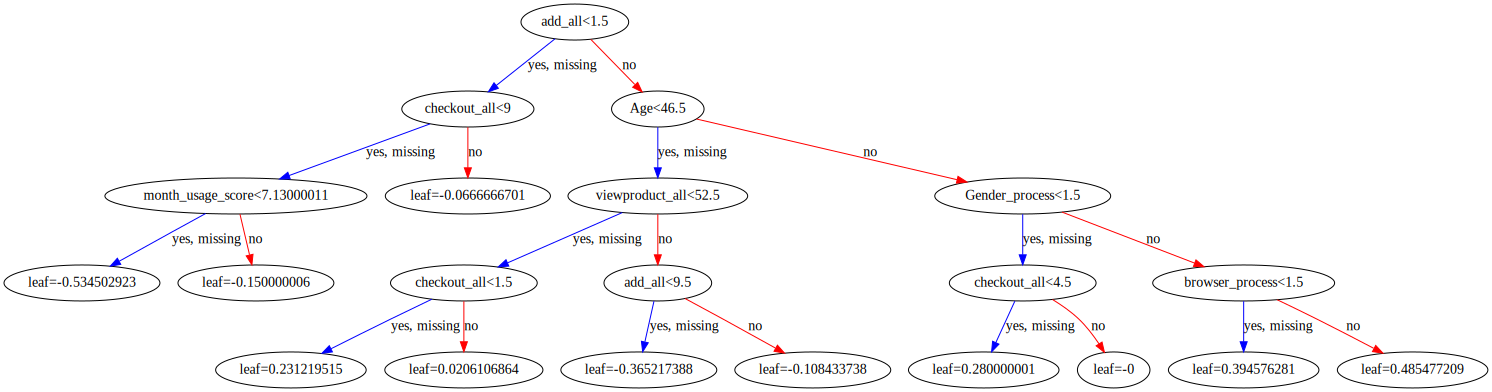

In [134]:
image = xgb.to_graphviz(model)
image

In [136]:
X_test['expect_y'] = expected_y
X_test['predict'] = predicted_y

C:\Users\Police\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Police\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
# pd.concat([X_test, y_test])
X_test.loc[(X_test['add_all'] > 1.5)&(X_test['Age'] >= 46.5)]

,Age,MemberCardLevel,month_usage_score,viewproduct_all,add_all,checkout_all,ave_purchase_grade,Gender_process,IsEnableEmail_process,IsEnablePushNotification_process,IsEnableShortMessage_process,platform_process,os_process,browser_process,location_highest_process,cumulated_value,average_cumulated_value,expect_y,predict
1225,121,10,0.86,140,4,6,83.0,2,1,1,1,0,0,2,2,29,2,0,1
3401,121,10,1.38,9,6,2,13.5,2,1,1,1,1,3,0,26,24,1,1,1
1496,50,10,2.00,3,2,1,10.0,0,1,1,1,0,0,0,2,2,1,0,1
879,121,20,0.08,22,2,3,17.5,2,0,1,1,1,3,0,24,24,1,0,0
2030,121,10,0.25,57,30,6,67.5,2,0,1,1,0,0,2,26,29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,121,10,0.33,9,2,1,16.0,2,0,1,1,1,3,1,13,13,2,1,1
3054,55,10,0.50,38,4,1,49.0,0,1,1,1,0,0,2,2,2,1,1,1
2935,121,10,0.38,15,4,2,29.0,2,1,1,1,0,0,2,2,2,1,1,1
1254,121,10,0.91,12,5,1,25.0,2,0,0,0,0,0,2,2,0,0,0,1


## 購買意圖分數為 y
#### 所有人

In [595]:
data = pd.read_csv('training data/會員資料和購買意圖整理對照表_with_new_score_label.csv', encoding='big5')

In [620]:
features = ['Age','MemberCardLevel','month_usage_score', 'Gender_process',
       'IsEnableEmail_process', 'IsEnablePushNotification_process',
       'IsEnableShortMessage_process', 'platform_process', 'os_process',
       'browser_process', 'location_highest_process', '人群標籤', 'cumulated_value']

In [621]:
X = data[features]
y = data["購買意圖標籤_new"]

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2,)
X_train.shape,X_test.shape

((2821, 13), (706, 13))

In [624]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=10)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=100)

In [625]:
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                   feature_names=features,
                   class_names=["0", "1", "2"],
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [626]:
graph.render(filename='img/y_for_score_with_all_people_new_score_label_1')

'img\\y_for_score_with_all_people_new_score_label_1.pdf'

In [627]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print('test accurancy:', accuracy_score(y_test,preds_pruned))
print('train accurancy:',accuracy_score(y_train,preds_pruned_train))

test accurancy: 0.5226628895184136
train accurancy: 0.5012406947890818


In [628]:
## 計算特徵重要性

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
cumulated_value,0.576109
Age,0.239871
人群標籤,0.184020
MemberCardLevel,0.000000
month_usage_score,0.000000
Gender_process,0.000000
IsEnableEmail_process,0.000000
IsEnablePushNotification_process,0.000000
IsEnableShortMessage_process,0.000000
platform_process,0.000000


#### 直接購買

In [629]:
data_direct = pd.read_csv('training data/會員資料+購買意圖整理對照表_直接購買.csv', encoding='big5')

In [650]:
features = ['Age','MemberCardLevel',
       'month_usage_score','Gender_process', 'IsEnableEmail_process',
       'IsEnablePushNotification_process', 'IsEnableShortMessage_process',
       'platform_process', 'os_process', 'browser_process',
       'location_highest_process', 'cumulated_value','average_cumulated_value']

In [651]:
X = data_direct[features]
y = data_direct['購買意圖標籤_new']

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.8,)
X_train.shape,X_test.shape

((313, 13), (1256, 13))

In [657]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=10)
clf_pruned.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=100)

In [658]:
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                   feature_names=features,
                   class_names=['0', '1', '2'],
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [659]:
graph.render(filename='img/direct_score_label_for_y')

'img\\direct_score_label_for_y.pdf'

In [660]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print('test accurancy:', accuracy_score(y_test,preds_pruned))
print('train accurancy:',accuracy_score(y_train,preds_pruned_train))

test accurancy: 0.5095541401273885
train accurancy: 0.536741214057508


In [661]:
## 計算特徵重要性

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
cumulated_value,0.514032
average_cumulated_value,0.345509
Age,0.093829
browser_process,0.046631
MemberCardLevel,0.000000
month_usage_score,0.000000
Gender_process,0.000000
IsEnableEmail_process,0.000000
IsEnablePushNotification_process,0.000000
IsEnableShortMessage_process,0.000000


#### 影響最深

In [668]:
data_ad = pd.read_csv('training data/影響最深-所有資料對照表.csv', encoding='big5')

In [682]:
data_ad.columns
features = ['Age', 'MemberCardLevel', 'month_usage_score',
       'Gender_process', 'IsEnableEmail_process',
       'IsEnablePushNotification_process', 'IsEnableShortMessage_process',
       'platform_process', 'os_process', 'browser_process',
       'location_highest_process', 'cumulated_value','average_cumulated_value','cs_process', 'cm_process']

In [683]:
X = data_ad[features]
y = data_ad['購買意圖標籤_new']

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2,)
X_train.shape,X_test.shape

((1566, 15), (392, 15))

In [685]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [686]:
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                   feature_names=features,
                   class_names=['0', '1', '2'],
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [689]:
graph.render(filename='img/ad_only_member_score_1')

'img\\ad_only_member_score_1.pdf'

In [690]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print('test accurancy:', accuracy_score(y_test,preds_pruned))
print('train accurancy:',accuracy_score(y_train,preds_pruned_train))

test accurancy: 0.5714285714285714
train accurancy: 0.5312899106002554


In [691]:
## 計算特徵重要性

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
cumulated_value,0.503463
average_cumulated_value,0.416616
cs_process,0.079921
Age,0.000000
MemberCardLevel,0.000000
month_usage_score,0.000000
Gender_process,0.000000
IsEnableEmail_process,0.000000
IsEnablePushNotification_process,0.000000
IsEnableShortMessage_process,0.000000


## 以累計消費金額為 y
所有人

In [576]:
data = pd.read_csv('training data/會員資料和購買意圖整理對照表_with_new_score_label.csv', encoding='big5')

In [578]:
features = ['Age', 'MemberCardLevel','month_usage_score','人群標籤',
       'viewproduct_all', 'add_all', 'checkout_all', 'ave_purchase_grade',
       'Gender_process', 'IsEnableEmail_process',
       'IsEnablePushNotification_process', 'IsEnableShortMessage_process',
       'platform_process', 'os_process', 'browser_process',
       'location_highest_process', '購買意圖標籤_new']

In [580]:
X = data[features]
y = data['cumulated_value']

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2,)
X_train.shape,X_test.shape

((2821, 17), (706, 17))

In [583]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [589]:
label = list(map(str, list(y.unique())) )

In [590]:
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                   feature_names=features,
                   class_names=label,
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [591]:
graph.render(filename='img/cummulated_value_for_y')

'img\\cummulated_value_for_y.pdf'

In [592]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print('test accurancy:', accuracy_score(y_test,preds_pruned))
print('train accurancy:',accuracy_score(y_train,preds_pruned_train))

test accurancy: 0.47875354107648727
train accurancy: 0.4930875576036866


In [593]:
## 計算特徵重要性

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
checkout_all,0.788666
add_all,0.135204
MemberCardLevel,0.068009
ave_purchase_grade,0.008120
Age,0.000000
IsEnableShortMessage_process,0.000000
location_highest_process,0.000000
browser_process,0.000000
os_process,0.000000
platform_process,0.000000


In [594]:
len(label)

41

# kmeans 

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [158]:
import os
from sklearn import cluster, datasets, metrics

In [173]:
features = ['Age','MemberCardLevel',
       'month_usage_score', 'Gender_process', 'IsEnableEmail_process',
       'IsEnablePushNotification_process', 'IsEnableShortMessage_process',
       'platform_process', 'os_process', 'browser_process',
       'location _highest_process', '購買意圖標籤', '人群標籤']

In [174]:
X = data[features]

## 1. 手肘法（elbow method）
根據 K 與 SSE 作圖，可以從中觀察到使 SSE 的下降幅度由「快速轉為平緩」的點，一般稱這個點為拐點（Inflection point），我們會將他挑選為 K。因為該點可以確保 K 值由小逐漸遞增時的一個集群效益，因此適合作為分群的標準。

In [175]:
n_clusters = 15
cost = []
for i in range(2,n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)

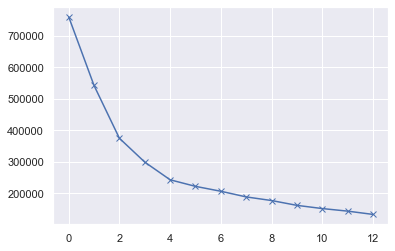

In [176]:
plt.plot(cost,'bx-')

## 2. 輪廓係數法（Silhouette Coefficient）
輪廓係數法的概念是「找出相同群凝聚度越小、不同群分離度越高」的值，也就是滿足 Cluster 一開始的目標。
值越大，表示效果越好，適合作為 K。

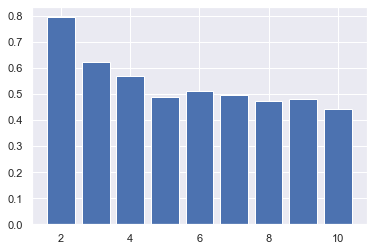

[0.7944441246028555, 0.6233510684753195, 0.5690670736517635, 0.48948813643223865, 0.5122311121412915, 0.4945496414096642, 0.472985707208498, 0.479662559947594, 0.44101289099033575]


In [177]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
silhouette_avgs
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [178]:
final_n_clusters = 3
final_kmeans = KMeans(final_n_clusters)
final_kmeans.fit(X)

KMeans(n_clusters=3)

In [179]:
y_kmeans = final_kmeans.predict(X)
y_kmeans

array([0, 0, 0, ..., 2, 2, 0])

In [180]:
print(final_kmeans.score(X))
silhouette_avg = metrics.silhouette_score(X, y_kmeans)
print(silhouette_avg)
print(metrics.calinski_harabasz_score(X, y_kmeans))

-542102.6790969307
0.6233510684753195
21006.581950192474


In [187]:
data['cluster'] = y_kmeans

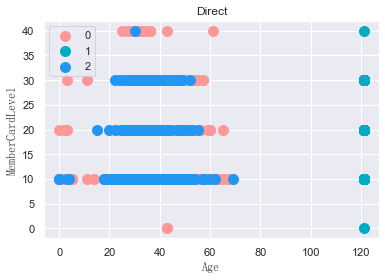

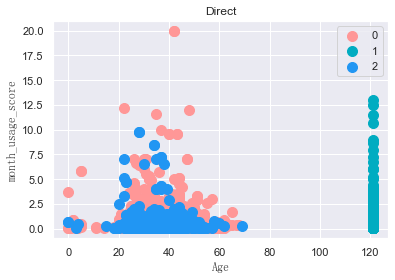

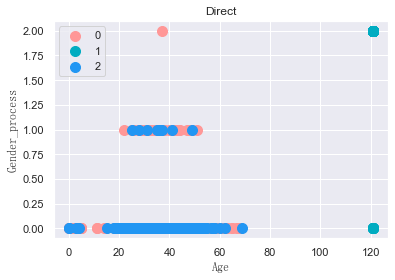

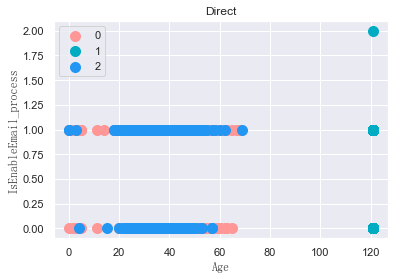

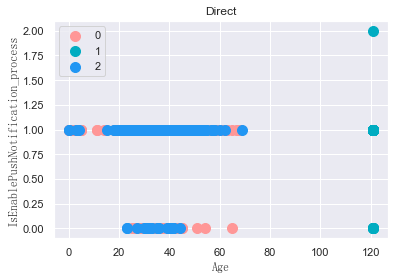

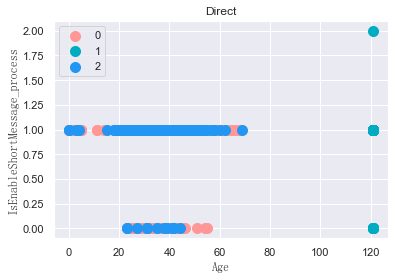

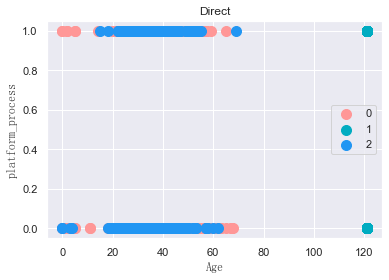

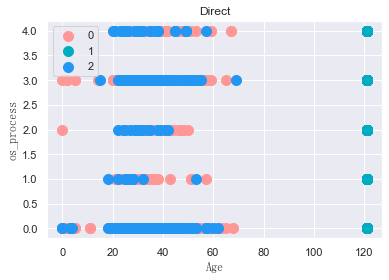

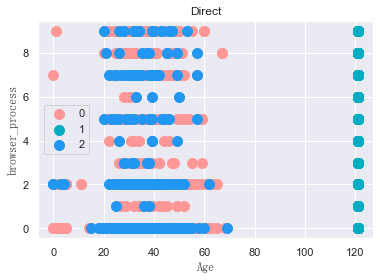

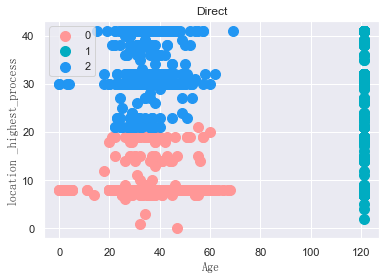

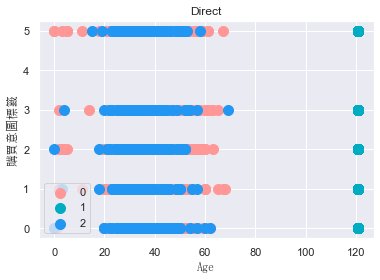

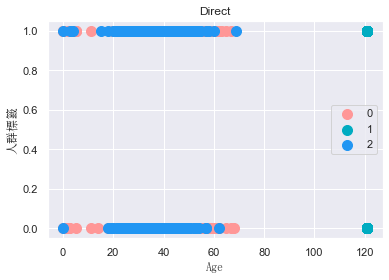

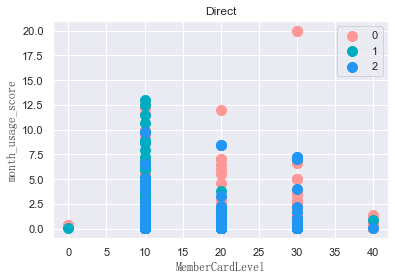

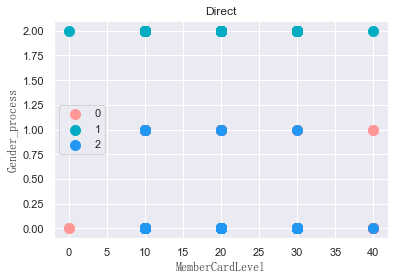

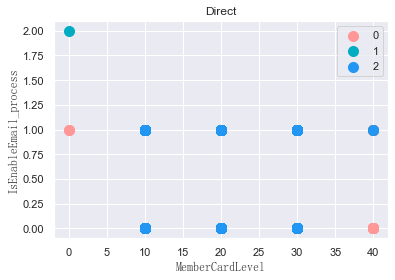

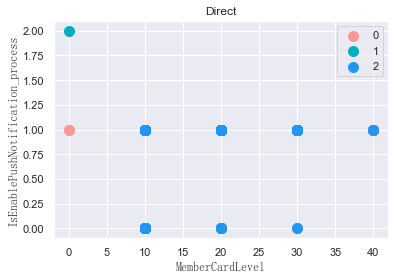

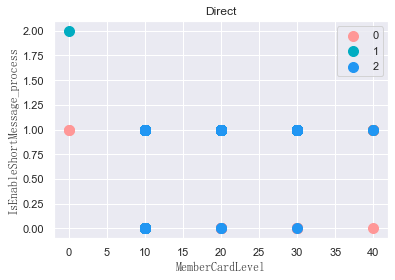

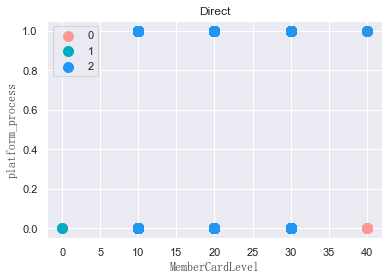

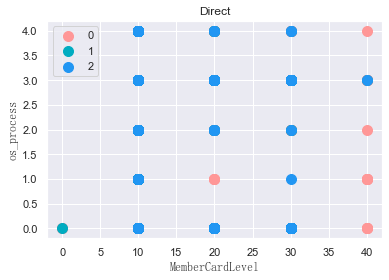

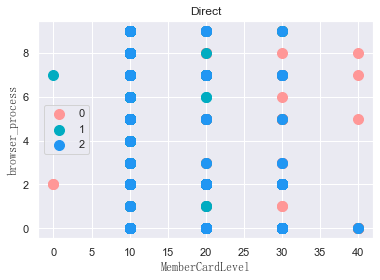

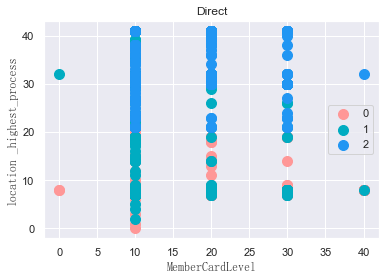

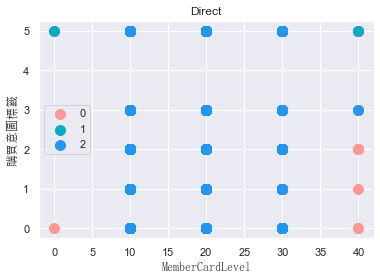

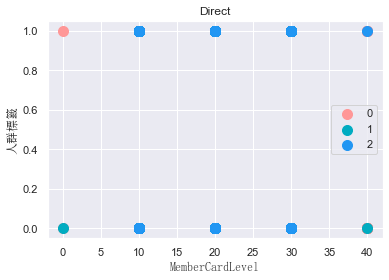

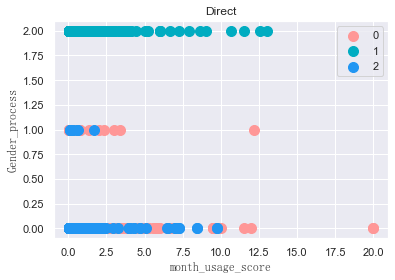

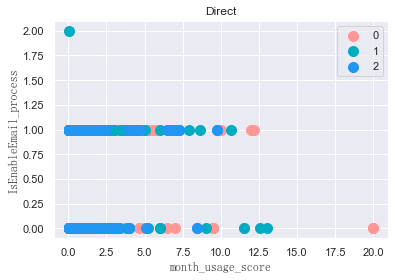

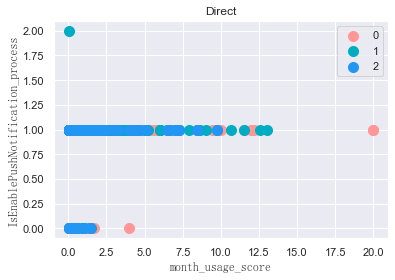

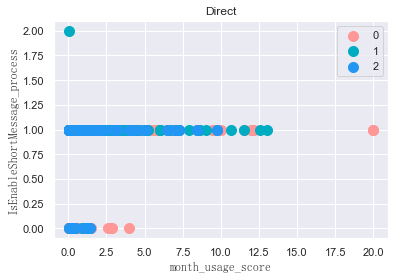

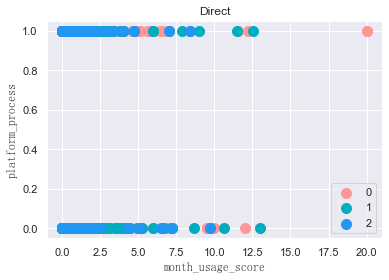

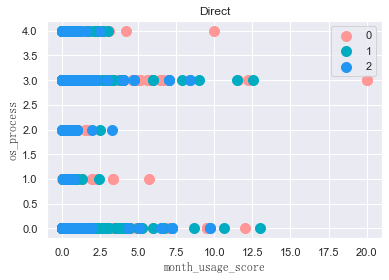

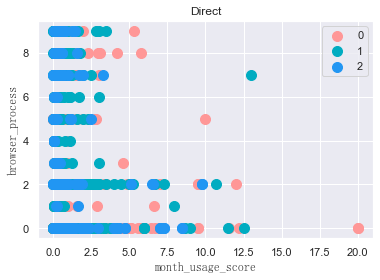

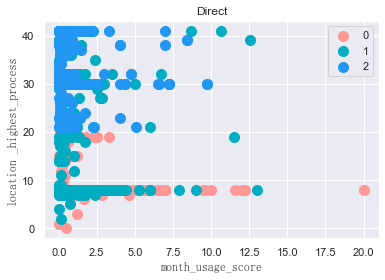

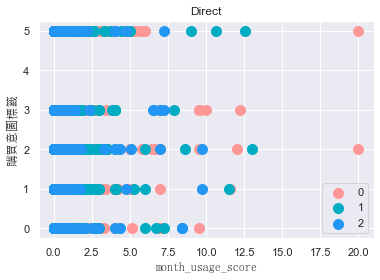

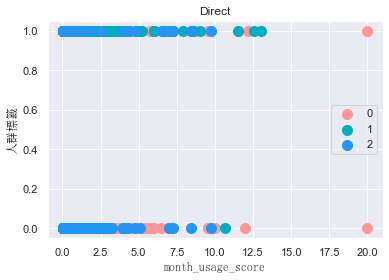

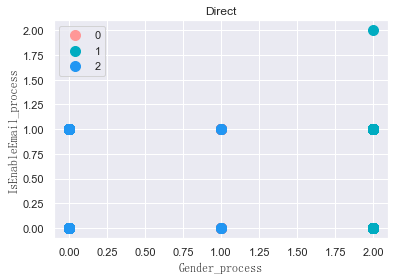

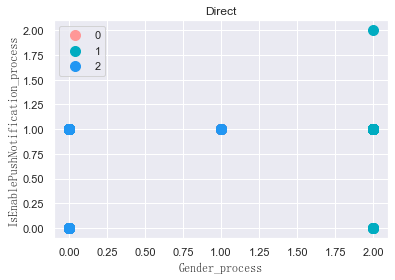

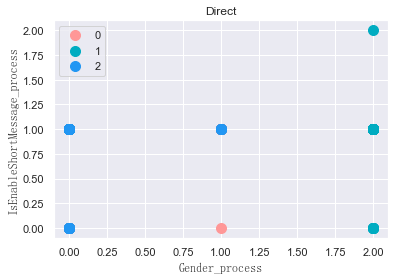

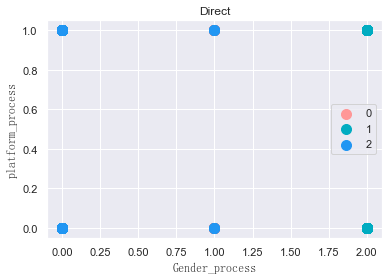

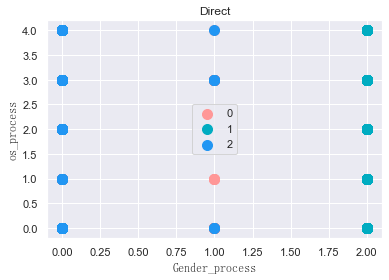

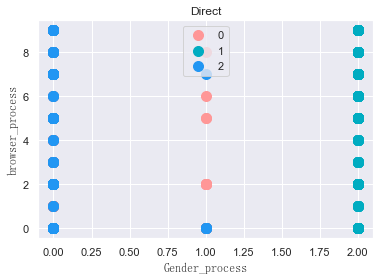

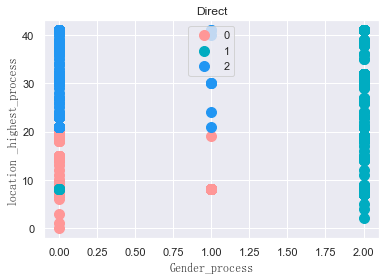

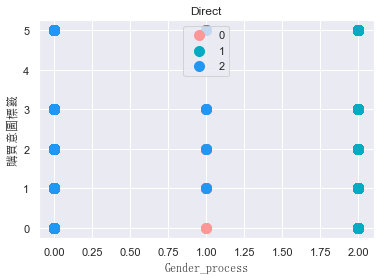

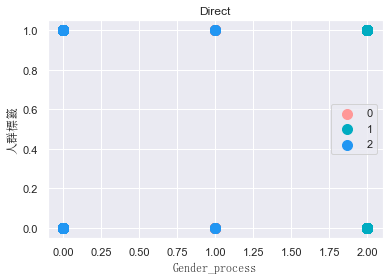

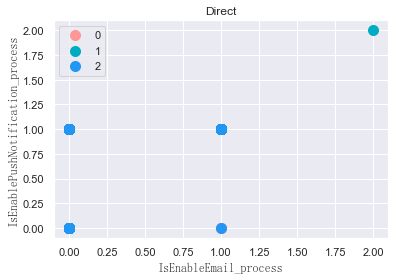

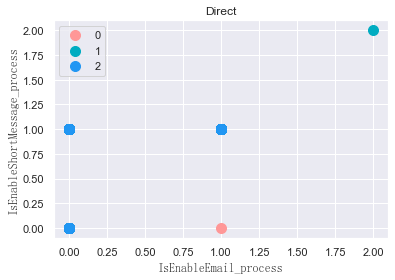

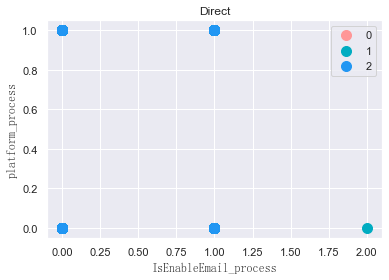

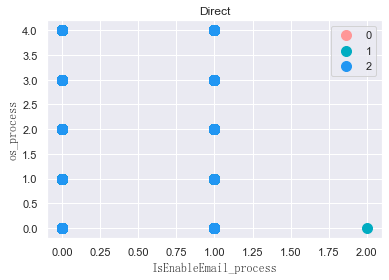

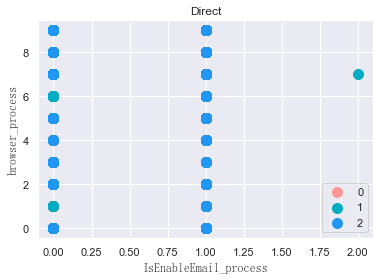

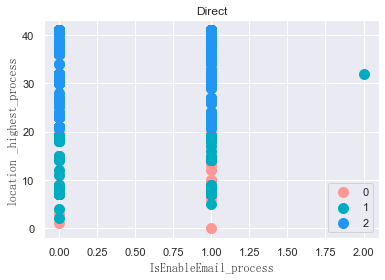

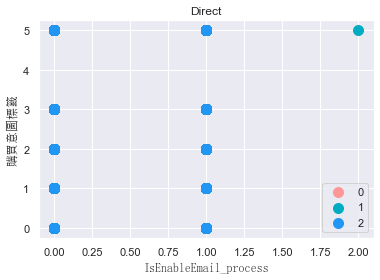

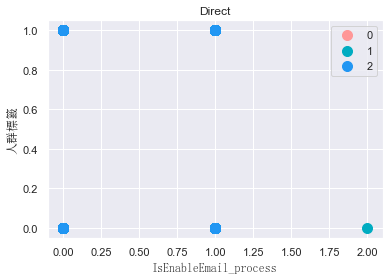

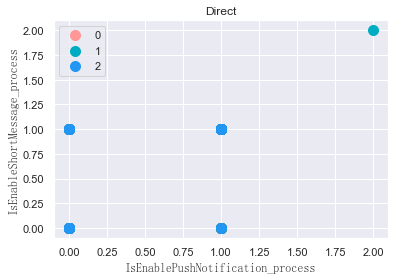

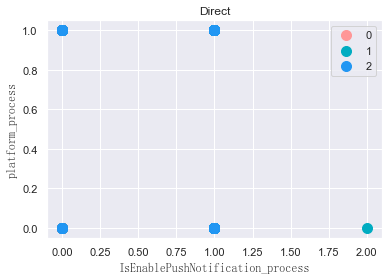

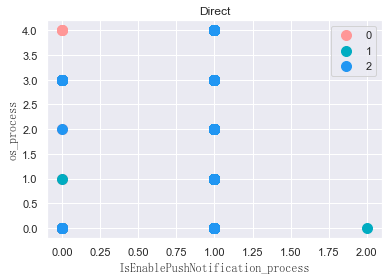

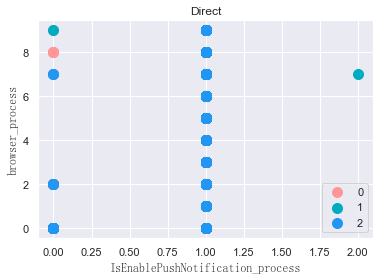

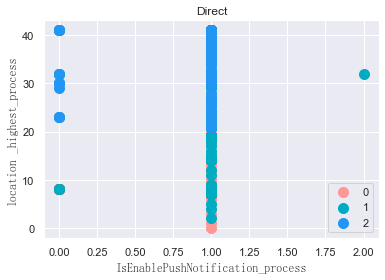

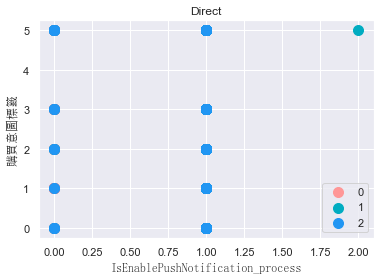

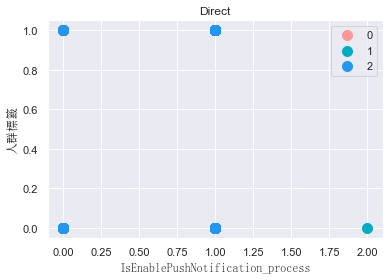

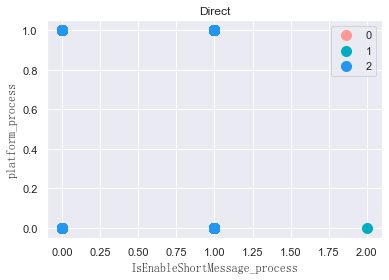

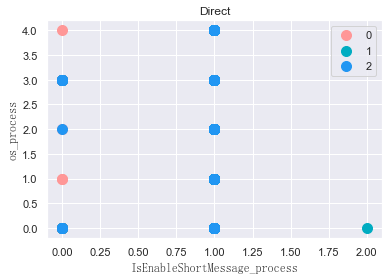

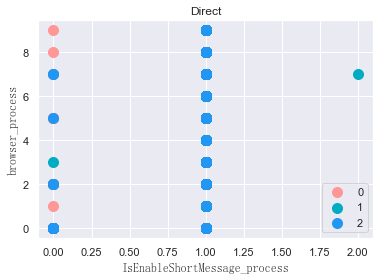

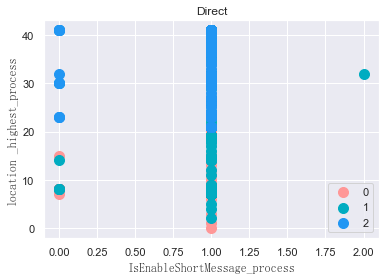

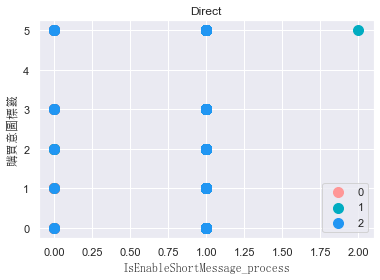

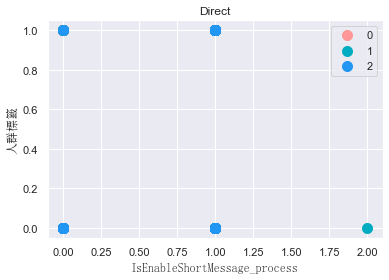

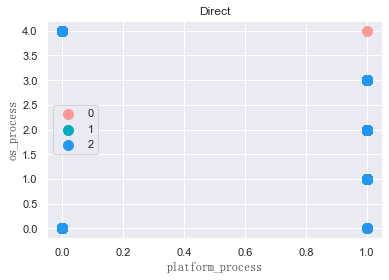

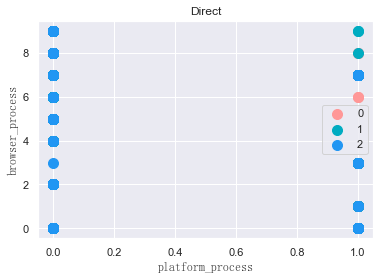

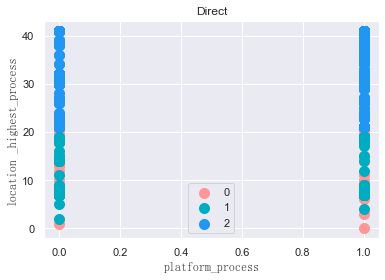

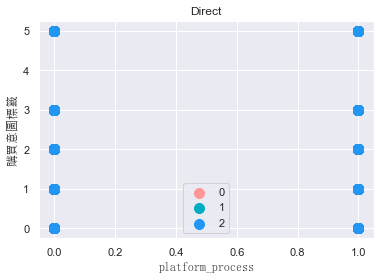

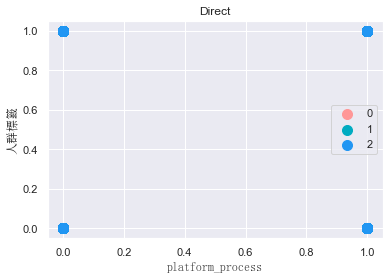

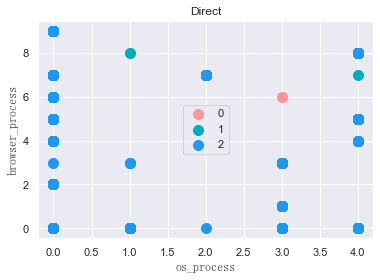

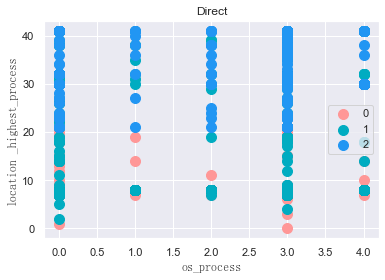

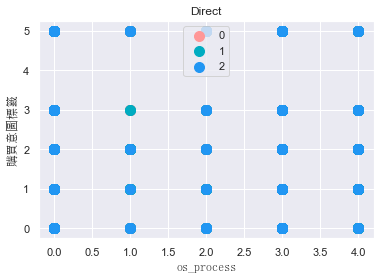

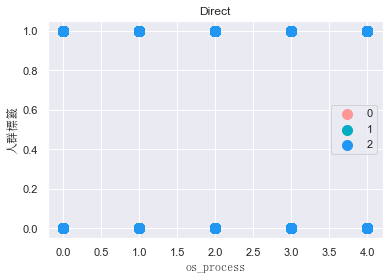

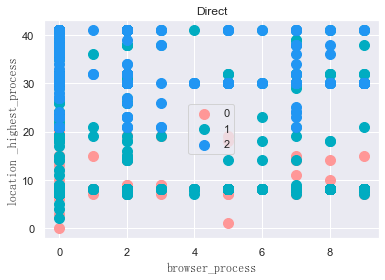

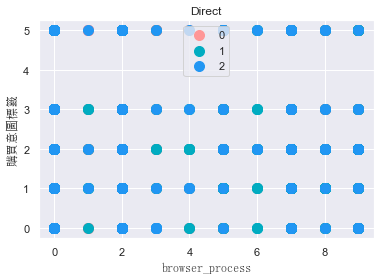

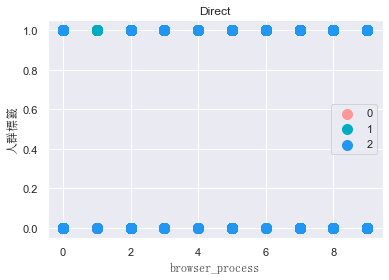

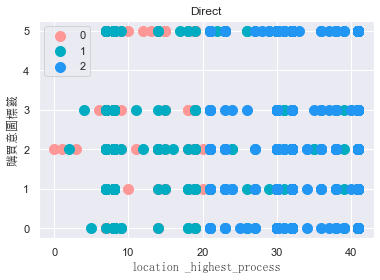

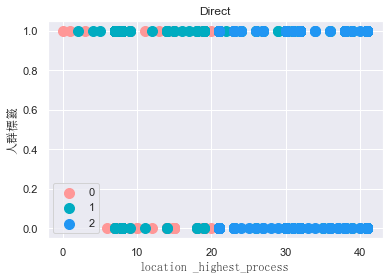

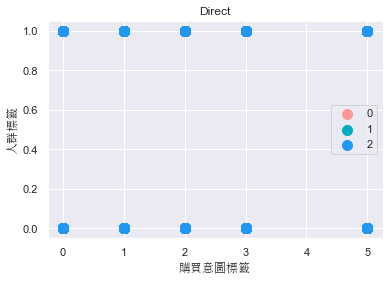

In [188]:
N = len(features)

os.makedirs('分群圖片/所有人')
color = ['#FF9797','#00ACC1', '#2196F3']
for i in range(N):
    for j in range(i+1, N):  
        plt.title('Direct')
        for k in range(3):
            df = data.loc[data['cluster']  == k]
            plt.scatter(df.loc[:, features[i]], df.loc[:, features[j]], s=100, c=color[k], label=k)
#         plt.scatter(train.loc[:, cols[i]], train.loc[:, cols[j]], c=y_kmeans, s=200, cmap='viridis')
        plt.legend(loc='best')
        plt.xlabel(features[i], fontsize=12, fontproperties="SimSun") #x軸標題
        plt.ylabel(features[j], fontsize=12, fontproperties="SimSun") #y軸標題
#     plt.tight_layout() #隔開兩個圖
        plt.savefig('./分群圖片/所有人/'+features[i]+'&'+features[j]+'.png')#儲存圖片
        plt.show()

In [50]:
data['cluster'] = y_kmeans

In [52]:
data.to_csv('result.csv', encoding='big5', index= False)